In [2]:
from matplotlib import pyplot as plt 
import numpy as np 
import pickle as pkl
import os
from scipy.stats import spearmanr

In [19]:
corrupt_res_ls = [pkl.load(open(f'/home/teddy/local/DVGS/adult_results/{x}/corruption_res_dict.pkl', 'rb')) for x in os.listdir('../adult_results/')]

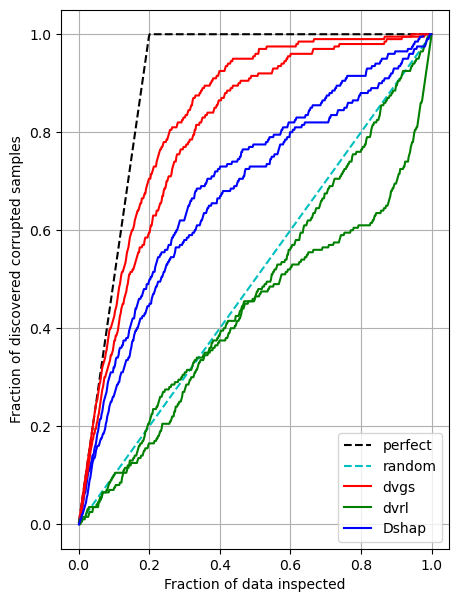

In [20]:

plt.figure(figsize=(5, 7))
plt.plot(corrupt_res_ls[0]['pk'], corrupt_res_ls[0]['p_perfect'], 'k--', label='perfect')
plt.plot(corrupt_res_ls[0]['pk'], corrupt_res_ls[0]['p_random'], 'c--', label='random')

for i,cres in enumerate(corrupt_res_ls): 
    if i == 0: 
        plt.plot(cres['pk'], cres['dvgs_corr'], 'r-', label='dvgs')
        plt.plot(cres['pk'], cres['dvrl_corr'], 'g-', label='dvrl')
        plt.plot(cres['pk'], cres['shap_corr'], 'b-', label='Dshap')
    else:
        plt.plot(cres['pk'], cres['dvgs_corr'], 'r-')
        plt.plot(cres['pk'], cres['dvrl_corr'], 'g-')
        plt.plot(cres['pk'], cres['shap_corr'], 'b-')
plt.legend()
plt.ylabel('Fraction of discovered corrupted samples')
plt.xlabel('Fraction of data inspected')
plt.grid(b=None)
plt.show()

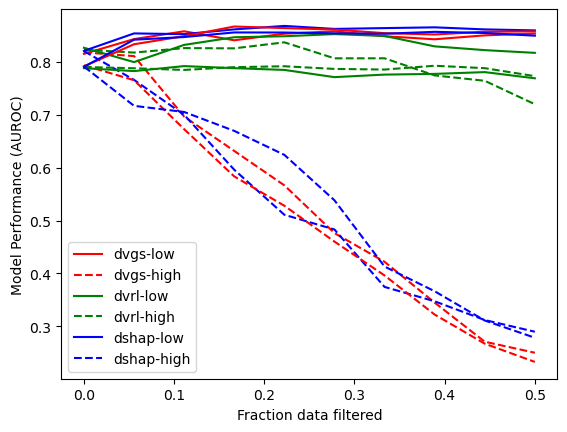

In [21]:
filter_res_ls = [pkl.load(open(f'/home/teddy/local/DVGS/adult_results/{x}/filtered_score_res_dict.pkl', 'rb')) for x in os.listdir('../adult_results/')]
plt.figure()

for i,filter_res in enumerate(filter_res_ls):
    if i==0:
        plt.plot(filter_res['qs'], filter_res['dvgs_low'], 'r-', label='dvgs-low')
        plt.plot(filter_res['qs'], filter_res['dvgs_high'], 'r--', label='dvgs-high')

        plt.plot(filter_res['qs'], filter_res['dvrl_low'], 'g-', label='dvrl-low')
        plt.plot(filter_res['qs'], filter_res['dvrl_high'], 'g--', label='dvrl-high')

        plt.plot(filter_res['qs'], filter_res['shap_low'], 'b-', label='dshap-low')
        plt.plot(filter_res['qs'], filter_res['shap_high'], 'b--', label='dshap-high')
    else: 
        plt.plot(filter_res['qs'], filter_res['dvgs_low'], 'r-')
        plt.plot(filter_res['qs'], filter_res['dvgs_high'], 'r--')

        plt.plot(filter_res['qs'], filter_res['dvrl_low'], 'g-')
        plt.plot(filter_res['qs'], filter_res['dvrl_high'], 'g--')

        plt.plot(filter_res['qs'], filter_res['shap_low'], 'b-')
        plt.plot(filter_res['qs'], filter_res['shap_high'], 'b--')
        
plt.xlabel('Fraction data filtered')
plt.ylabel('Model Performance (AUROC)')
plt.legend() 
plt.show()

In [5]:
shap_data_values = [np.load(f'../adult_results/{x}/dshap_data_values.npy') for x in os.listdir('../adult_results/')]
dvgs_data_values = [np.load(f'../adult_results/{x}/dvgs_data_values.npy') for x in os.listdir('../adult_results/')]


In [9]:
for dvgs, shap in zip(dvgs_data_values, shap_data_values): 
    print(spearmanr(dvgs,shap)[0])

0.485963561963562
0.5601423081423081
